# Gradient Descent Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Finding the Minimizer with Gradient Decent**

- Gradient decent is the fundamental algorithm that is behind ALL of the deep learning models, including ChatGPT...

- End goal of many of the deep learning models is to minimize a "cost function" with respect to the parameters in the system. Gradient decent is the ONLY tool to achieve this goal. Without proper understanding of it, it is not possible to fully comprehend how deep learning models work. There are tons of resources online. I would like to refer to Youtube videos whenever possible. Check the following links [1](https://www.youtube.com/watch?v=qg4PchTECck),[2](https://www.youtube.com/watch?v=Gbz8RljxIHo).


- You can find the following statement in any standard calculus-3 textbook; *the minimum rate of change of a function occurs in the direction of the negative gradient*. 

- This roughly(!) just means if you keep walking in opposite direction of the derivative of a function, you can reach the local minimum(usually not global minimum) of that function. 


- Mathematically speaking, let $f(\vec{x})$ be a function and $r$ be the step size we preassign. Then the following sequence

$$\vec{x}_{n+1}=\vec{x}_{n} - r\nabla f(\vec{x}_{n})$$ 

converges to a local minimum value of $f(\vec{x})$. Well, if you are lucky enough that $f(\vec{x})$ is a convex function, that point is actually global minimum, which is the best outcome.

**Ex1**: Find the minimizer of $f(x)=(x-2)^2+5$ using gradient decent method.
Try r = 0.01, x0 = 4, N = 10. Notice that this function has a global minimum at $\bar{x}=2$. If the algorithm works, it must converge to $\bar{x}=2$

In [2]:
#objective function
def f(x):
    return (x-2)**2 + 5

#derivative(gradient) of f(x)
def funder(x):    
    return 2*(x-2)

In [3]:
#learning rate
r = 0.01
#initial guess
x0 = 4

#number of epochs
N = 10
for n in range(N):
    x_new = x0 - r * funder(x0)  # gradient decent step
    x0 = x_new                      # update the current guess
    print(f'n: {n} x_n: {x_new:0.6f} f(x_n): {f(x_new):0.6f}')

n: 0 x_n: 3.960000 f(x_n): 8.841600
n: 1 x_n: 3.920800 f(x_n): 8.689473
n: 2 x_n: 3.882384 f(x_n): 8.543370
n: 3 x_n: 3.844736 f(x_n): 8.403052
n: 4 x_n: 3.807842 f(x_n): 8.268291
n: 5 x_n: 3.771685 f(x_n): 8.138867
n: 6 x_n: 3.736251 f(x_n): 8.014568
n: 7 x_n: 3.701526 f(x_n): 7.895191
n: 8 x_n: 3.667496 f(x_n): 7.780541
n: 9 x_n: 3.634146 f(x_n): 7.670432


Here are some cool machine learning jargons;
- $r$ = learning rate
- $N$ = number of epochs
- $x0$ = initial guess
- $f(x)$ = target,cost,loss,objective function
- $f'(x)$ = gradient

- Now it is time to play with parameters. First of all, 3.66 is pretty far away from 2. There are a couple of ways to do; (1) increase the learning rate;(2) Increase the number of epochs; (3) Find a better initial guess. 

- In real applications, forget about (3) which is practically not possible. (2) is generally what we try. (1) can be done but be careful not to diverge. By changing the parameter and watching the results will give you a general idea about how they effect the algorithm. 

- Ultimate goal is to obtain a sufficently good approximation with fewer steps. To achieve this, we can increase the learning rate to approach the minimum faster, keeping in mind that we can diverce down on the way. 

- Alternatively, we can attempt to start with a closer initial guess to the minimum point so that we can converge quickly. However, this is not possible in real problems as we dont know where the minimum point is. 
- Quantities such as learning rate, number of epochs and so many other we will see later are called **"hyperparameters"** or **"learnable"** parameters or **"tunable"** parameters. To achieve the best approximation, we tune these parameters in the model.

**Ex2**: Find the minimizer for $f(x,y)=(x-2)^2+(y-3)^2+10$. Notice that this function assumes its minimum at $(x,y)=(2,3)$ with min value $z=10$. Now let's use gradient decent to approximate this point. The surface is given below
![](https://drive.google.com/uc?export=view&id=1Df_UqnAFbubyCGB-EbfVAGVYWJo3GnSs)


In [4]:
# Notice how we use (x[0],x[1]) instead of (x,y)
def f(x):
    # x: numpy array
    return (x[0]-2)**2+(x[1]-3)**2+10

def gradf(x):
    # return the gradient of f as a numpy array
    return np.array([2*(x[0]-2),2*(x[1]-3)])

In [5]:
#Now lets set up the gradien decent
x_old = np.array([0,0]) #initial guess
r = 0.1                 #learning rate
N = 20                 #number of epochs
for i in range(N):
    x_new = x_old - r*gradf(x_old)
    x_old = x_new
    #if i%10==0:
    print(f'n: {i} [x_n,y_n]: {x_new} f(x_n,y_n): {f(x_new):0.6f}')

n: 0 [x_n,y_n]: [0.4 0.6] f(x_n,y_n): 18.320000
n: 1 [x_n,y_n]: [0.72 1.08] f(x_n,y_n): 15.324800
n: 2 [x_n,y_n]: [0.976 1.464] f(x_n,y_n): 13.407872
n: 3 [x_n,y_n]: [1.1808 1.7712] f(x_n,y_n): 12.181038
n: 4 [x_n,y_n]: [1.34464 2.01696] f(x_n,y_n): 11.395864
n: 5 [x_n,y_n]: [1.475712 2.213568] f(x_n,y_n): 10.893353
n: 6 [x_n,y_n]: [1.5805696 2.3708544] f(x_n,y_n): 10.571746
n: 7 [x_n,y_n]: [1.66445568 2.49668352] f(x_n,y_n): 10.365917
n: 8 [x_n,y_n]: [1.73156454 2.59734682] f(x_n,y_n): 10.234187
n: 9 [x_n,y_n]: [1.78525164 2.67787745] f(x_n,y_n): 10.149880
n: 10 [x_n,y_n]: [1.82820131 2.74230196] f(x_n,y_n): 10.095923
n: 11 [x_n,y_n]: [1.86256105 2.79384157] f(x_n,y_n): 10.061391
n: 12 [x_n,y_n]: [1.89004884 2.83507326] f(x_n,y_n): 10.039290
n: 13 [x_n,y_n]: [1.91203907 2.8680586 ] f(x_n,y_n): 10.025146
n: 14 [x_n,y_n]: [1.92963126 2.89444688] f(x_n,y_n): 10.016093
n: 15 [x_n,y_n]: [1.943705   2.91555751] f(x_n,y_n): 10.010300
n: 16 [x_n,y_n]: [1.954964   2.93244601] f(x_n,y_n): 10.00

**Ex3**: Let's consider the function $$f(x)=2\sin{x}+5\sin{2x}+7\sin{0.5x}$$ 

We can easily plot this function as follows. We can see that there are 2 local minima(x=2.42,x=5.45) and 1 global minima(x=8.72), We would like to approach the global one.

- Play with the initial guess to see if you can approach the global one. You will see that you will get stuck in one of the local minimas! 

- This is because your function is NOT convex any more, welcome to hell! Lots of research groups are working to improve this issue. 

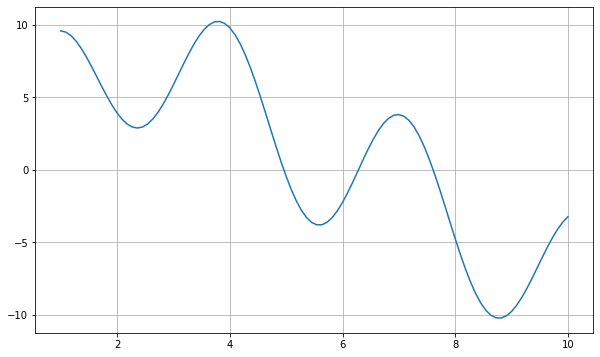

In [6]:
x = np.linspace(1,10,100)
y = 2*np.sin(x)+5*np.sin(2*x)+7*np.sin(0.5*x)
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.grid('on')

In [7]:
from math import sin,cos
#objective function
def f(x):
    return 2*sin(x)+5*sin(2*x)+7*sin(0.5*x)

#derivative(gradient) of f(x)
def funder(x):    
    return 2*cos(x)+10*cos(2*x)+0.5*cos(0.5*x)

In [8]:
r = 0.1
x_old = 8
N = 100
for n in range(N):
    x_new = x_old - r * funder(x_old)  # gradient decent step
    x_old = x_new                      # update the current guess
    if n%10==0:
      print(f'n: {n} x_n: {x_new:0.6f} f(x_n): {f(x_new):0.6f}')

n: 0 x_n: 9.019442 f(x_n): -9.691829
n: 10 x_n: 8.771033 f(x_n): -10.240705
n: 20 x_n: 8.735551 f(x_n): -10.224357
n: 30 x_n: 8.727374 f(x_n): -10.217029
n: 40 x_n: 8.725450 f(x_n): -10.215110
n: 50 x_n: 8.724996 f(x_n): -10.214647
n: 60 x_n: 8.724889 f(x_n): -10.214537
n: 70 x_n: 8.724864 f(x_n): -10.214511
n: 80 x_n: 8.724858 f(x_n): -10.214505
n: 90 x_n: 8.724857 f(x_n): -10.214503
